In [33]:
%load_ext autoreload

%autoreload 2

import importlib
import matplotlib.pyplot as plt
import pandas as pd
import pdb
import math
import numpy as np
import katpivot as kp 
#importlib.reload(kp)
 
DATA_DIR = "data/"

data = pd.read_csv(DATA_DIR+"Facebook_ads-PIVOT_2021.csv", sep=";")
data = kp.clean_data_ads(data)
stories, _ = kp.read_clean_stories(data, DATA_DIR+"PIVOT story pipeline.xlsx", sheetname="Completed")
#write to file 
data.to_excel(DATA_DIR+"Facebook_ads_PIVOT_2021_mod.xlsx")
stories.to_excel(DATA_DIR+"story_chara.xlsx")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/Cellar/jupyterlab/3.0.16/libexec/lib/python3.9/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [34]:
#maybe make this into a function 
s1 = data["is_video"]==False
s2 = data["language"]=="en"
s3 = data["hypothesis"]=="h1"
data[s1&s2&s3]

,ad-name,target,Hypothesis 1,Hypothesis 2,Hypothesis 3,Teaser,English,French,video,campaign 1,...,Video watches at 50%,Video watches at 75%,Video watches at 95%,Video watches at 100%,is_video,is_portrait,name,language,hypothesis,age
112,entrepreneur_portraits-anie_rouleau-h1-infogra...,int-entrepreneur-can-all-25-34,37,0,0,0,0,59,0,0,...,0,0,0,0,False,True,anie_rouleau,en,h1,25-34
115,entrepreneur_portraits-bill_spenceley-h1-infog...,int-entrepreneur-can-all-25-34,39,0,0,0,0,61,0,0,...,0,0,0,0,False,True,bill_spenceley,en,h1,25-34
118,entrepreneur_portraits-lil_macpherson-h1-infog...,int-entrepreneur-can-all-25-34,39,0,0,0,0,61,0,0,...,0,0,0,0,False,True,lil_macpherson,en,h1,25-34
120,entrepreneur_portraits-matt_jamieson-h1-infogr...,int-entrepreneur-can-all-25-34,38,0,0,0,0,60,0,0,...,0,0,0,0,False,True,matt_jamieson,en,h1,25-34
123,entrepreneur_portraits-matthieu_bonneau-h1-inf...,int-entrepreneur-can-all-25-34,41,0,0,0,0,63,0,0,...,0,0,0,0,False,True,matthieu_bonneau,en,h1,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,entrepreneur_portraits-paul_rak-h1-infography-...,ret_videoviews-none-can-all-65+,33,0,0,0,0,55,0,0,...,0,0,0,0,False,True,paul_rak,en,h1,65+
1348,entrepreneur_portraits-tabitha_langel-h1-infog...,ret_videoviews-none-can-all-65+,39,0,0,0,0,61,0,0,...,0,0,0,0,False,True,tabitha_langel,en,h1,65+
1351,entrepreneur_portraits-teresa_reid_-h1-infogra...,ret_videoviews-none-can-all-65+,37,0,0,0,0,59,0,0,...,0,0,0,0,False,True,teresa_reid_,en,h1,65+
1354,entrepreneur_portraits-thompson_tran-h1-infogr...,ret_videoviews-none-can-all-65+,38,0,0,0,0,60,0,0,...,0,0,0,0,False,True,thompson_tran,en,h1,65+


In [3]:
kp.get_article_targets_for_feature(data, "h1","Post engagements")
kp.get_article_impressions_for_feature(data, "h2")

array([ 6013,  2374,  4792,  4519,   968, 22413,   117,  4260,  2891,
        2457,  5340,  5769,   739])

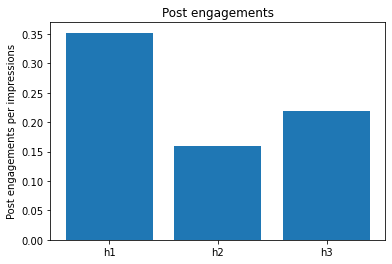

In [35]:
target = "Post engagements"
kp.make_barchart(data, target)
plt.savefig("Post_engagements_barchart.png")

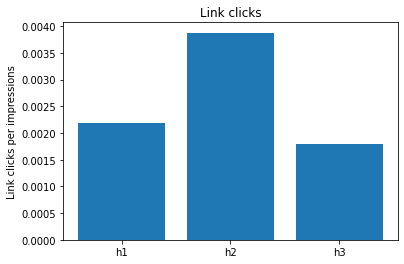

In [38]:
target = "Link clicks"
kp.make_barchart(data, target)
plt.savefig("Link_clicks_barchart.png")

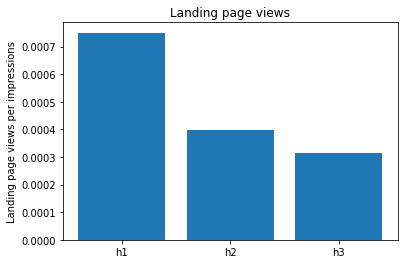

In [39]:
target = "Landing page views"
kp.make_barchart(data, target)
plt.savefig("Landing_page_views.png")

In [40]:
data.columns

Index(['ad-name', 'target', 'Hypothesis 1', 'Hypothesis 2', 'Hypothesis 3',
       'Teaser', 'English', 'French', 'video', 'campaign 1', 'campaign 2',
       'campaign 3', 'initial exposure', 'returning after interaction',
       'returning after video', 'entrepreneur (audience)', 'Cost',
       'Impressions', 'Post shares', 'Post reactions', 'Post comments',
       'Link clicks', 'Post engagements', 'Landing page views',
       'Three-second video views', 'Video watches at 50%',
       'Video watches at 75%', 'Video watches at 95%', 'Video watches at 100%',
       'is_video', 'is_portrait', 'name', 'language', 'hypothesis', 'age'],
      dtype='object')

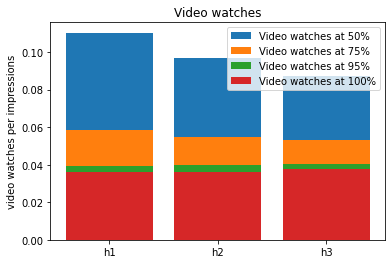

In [41]:
columns = ['Video watches at 50%',
       'Video watches at 75%', 'Video watches at 95%', 'Video watches at 100%']
selection = {'is_video':True,}
kp.make_multi_barchart(data, columns, selection, title="Video watches")
plt.savefig("videowatches.png")

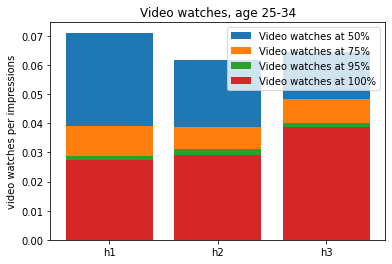

In [42]:
columns = ['Video watches at 50%',
       'Video watches at 75%', 'Video watches at 95%', 'Video watches at 100%']
selection={'is_video':True, "age":"25-34"}
kp.make_multi_barchart(data, columns, selection, title="Video watches, age 25-34")
plt.savefig("videowatches.png")

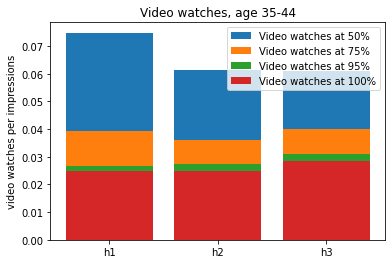

In [43]:
columns = ['Video watches at 50%',
       'Video watches at 75%', 'Video watches at 95%', 'Video watches at 100%']
selection={'is_video':True, "age":"35-44"}
kp.make_multi_barchart(data, columns, selection, title="Video watches, age 35-44")
plt.savefig("videowatches.png")

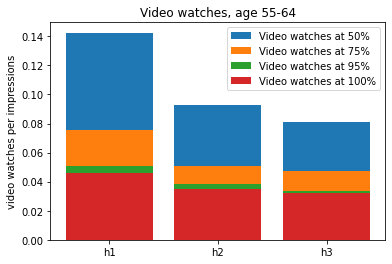

In [44]:
columns = ['Video watches at 50%',
       'Video watches at 75%', 'Video watches at 95%', 'Video watches at 100%']
selection={'is_video':True, "age":"55-64"}
kp.make_multi_barchart(data, columns, selection, title="Video watches, age 55-64")
plt.savefig("videowatches.png")

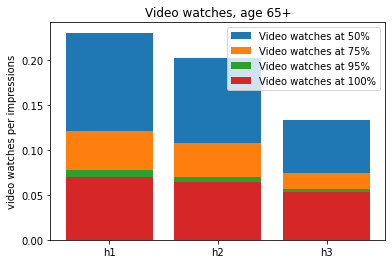

In [45]:
columns = ['Video watches at 50%',
       'Video watches at 75%', 'Video watches at 95%', 'Video watches at 100%']
selection={'is_video':True, "age":"65+"}
kp.make_multi_barchart(data, columns, selection, title="Video watches, age 65+")
plt.savefig("videowatches.png")

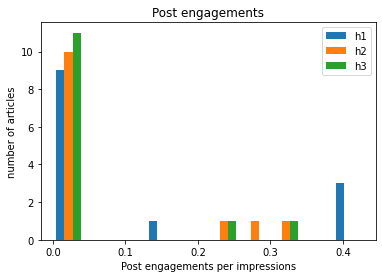

In [46]:
kp.make_multi_histogram(data, "Post engagements")
plt.savefig("post_engagements_histogram.png")

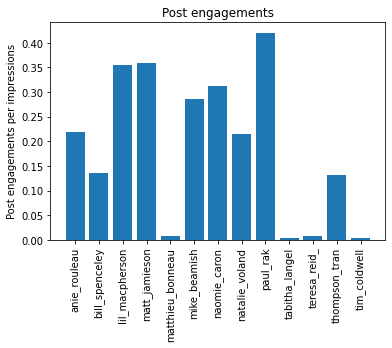

In [47]:
features = list(kp.get_article_names(data))
#sort_by = "target"
sort_by=None
kp.make_barchart(data, 'Post engagements', feature_col = "name", features = features, sort_by = sort_by, color_by = "hypothesis")
_ = plt.xticks(rotation=90)

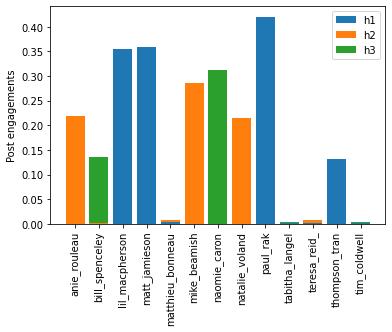

In [53]:
target = "Post engagements"
features = list(kp.get_article_names(data))
stack_column="hypothesis"
title=""
kp.make_stacked_barchart2(data, target, stack_column=stack_column, feature_column = "name", title=title)

Text(0.5, 1.0, 'Post engagements (only by h1)')

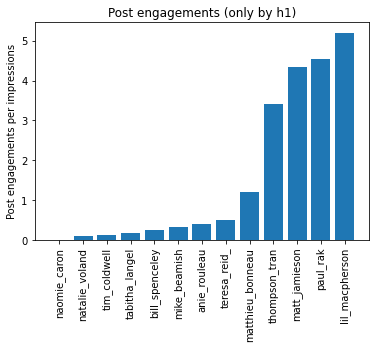

In [22]:
features = list(kp.get_article_names(data))
kp.make_barchart(data, 'Post engagements', selection={"hypothesis":"h1"}, feature_col = "name", features = features, sort_by = "target")
plt.xticks(rotation=90)
plt.title("Post engagements (only by h1)")

Text(0.5, 1.0, 'Post engagements (only by h2)')

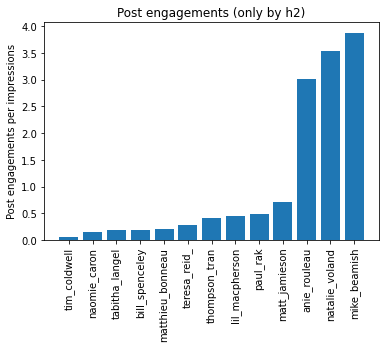

In [23]:
features = list(kp.get_article_names(data))
kp.make_barchart(data, 'Post engagements', selection={"hypothesis":"h2"}, feature_col = "name", features = features, sort_by = "target")
plt.xticks(rotation=90)
plt.title("Post engagements (only by h2)")

Text(0.5, 1.0, 'Post engagements (only by h3)')

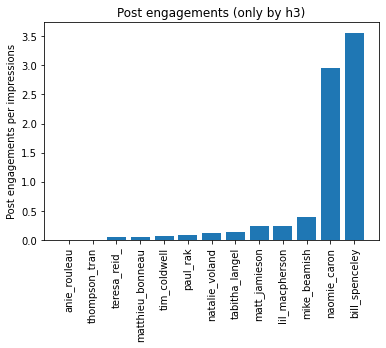

In [24]:
features = list(kp.get_article_names(data))
kp.make_barchart(data, 'Post engagements', selection={"hypothesis":"h3"}, feature_col = "name", features = features, sort_by = "target")
plt.xticks(rotation=90)
plt.title("Post engagements (only by h3)")